In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import pearsonr, ttest_ind, mannwhitneyu

In [15]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

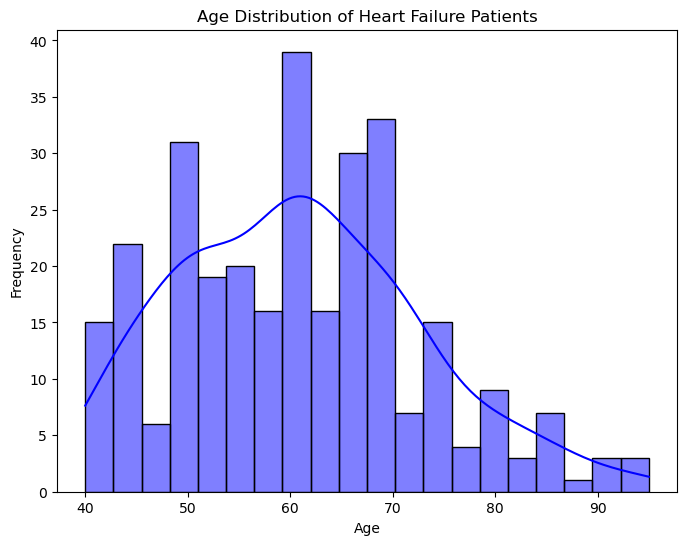

In [16]:
# 1. Distribution of Age among Heart Failure Patients

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


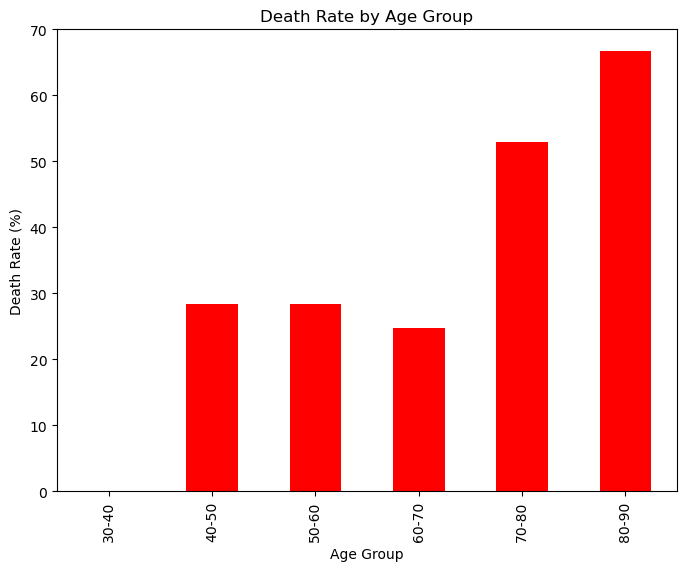

In [17]:
# How does the death rate vary with age?

# Death rate by age group
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70, 80, 90], labels=['30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
death_rate_by_age = df.groupby('age_group')['DEATH_EVENT'].mean() * 100

plt.figure(figsize=(8, 6))
death_rate_by_age.plot(kind='bar', color='red')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.show()


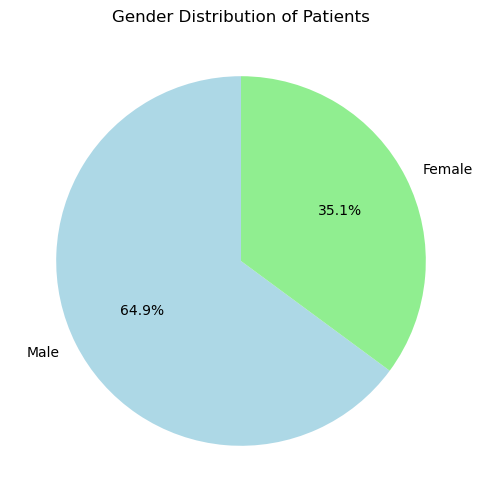

In [18]:
# 3. What is the percentage of male and female patients?

# Percentage of male and female patients
gender_counts = df['sex'].value_counts(normalize=True) * 100
gender_labels = ['Male', 'Female']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution of Patients')
plt.show()


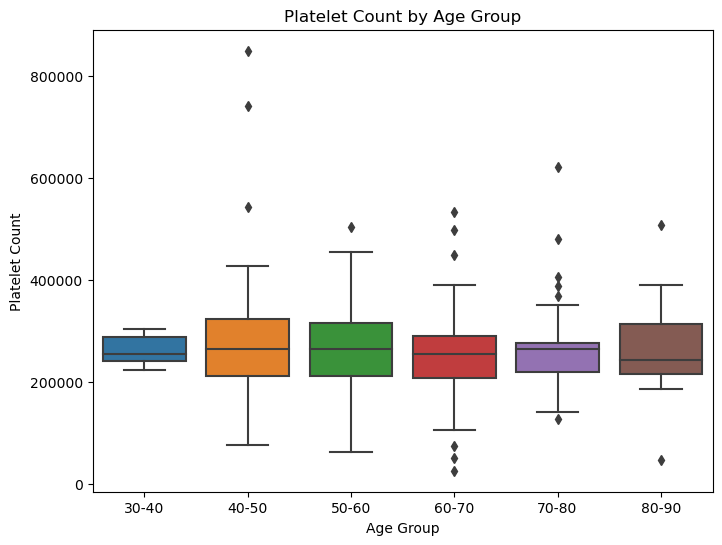

In [19]:
# 4. How does the platelet count vary among different age groups?

# Platelet count by age group
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='platelets', data=df)
plt.title('Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()


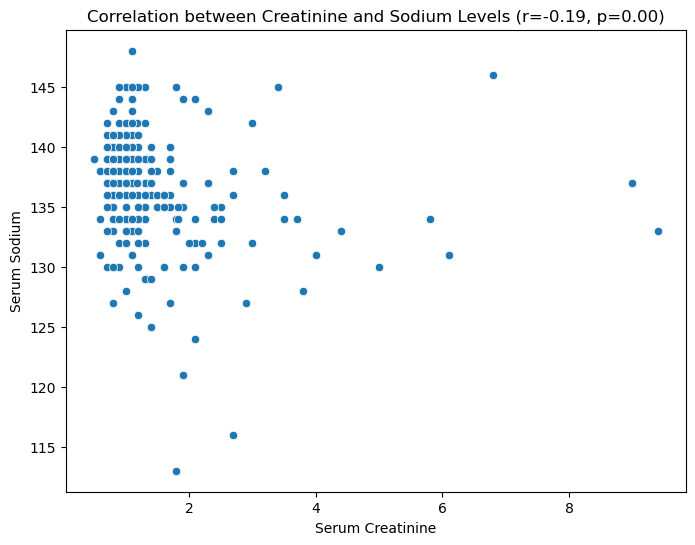

Pearson Correlation: -0.18909521009117386, P-value: 0.0010170806879368118


In [20]:
# 5. Is there a correlation between creatinine and sodium levels in the blood?

creatinine = df['serum_creatinine']
sodium = df['serum_sodium']
correlation, p_value = pearsonr(creatinine, sodium)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=creatinine, y=sodium)
plt.title(f'Correlation between Creatinine and Sodium Levels (r={correlation:.2f}, p={p_value:.2f})')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()

print(f'Pearson Correlation: {correlation}, P-value: {p_value}')

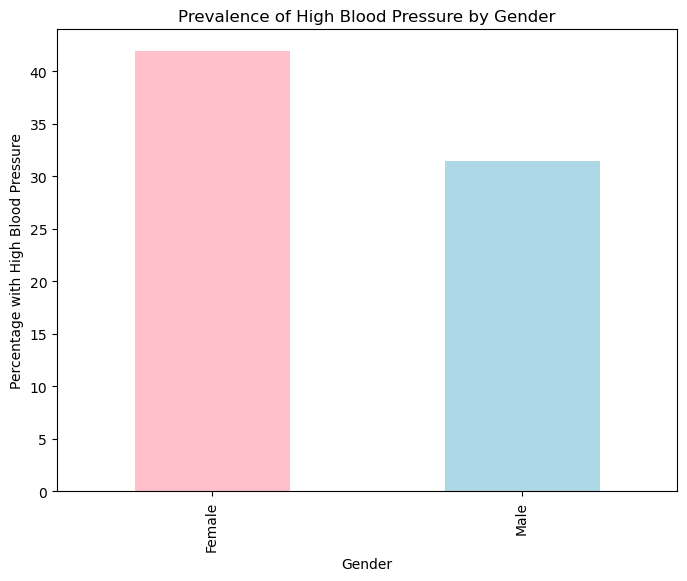

In [21]:
# 6. How does the prevalence of high blood pressure differ between male and female patients?

hbp_by_gender = df.groupby('sex')['high_blood_pressure'].mean() * 100
gender_labels = ['Female', 'Male']

plt.figure(figsize=(8, 6))
hbp_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage with High Blood Pressure')
plt.xticks([0, 1], gender_labels)
plt.show()


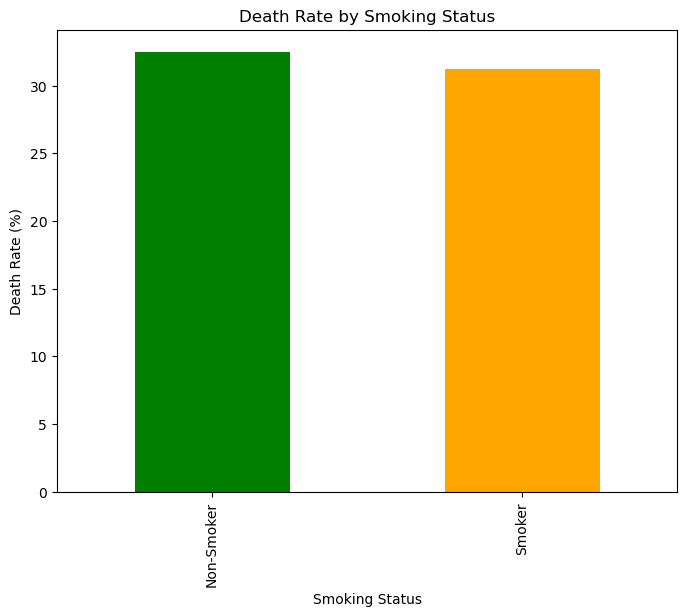

In [22]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?

smoking_death_rate = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
smoking_labels = ['Non-Smoker', 'Smoker']

plt.figure(figsize=(8, 6))
smoking_death_rate.plot(kind='bar', color=['green', 'orange'])
plt.title('Death Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Death Rate (%)')
plt.xticks([0, 1], smoking_labels)
plt.show()


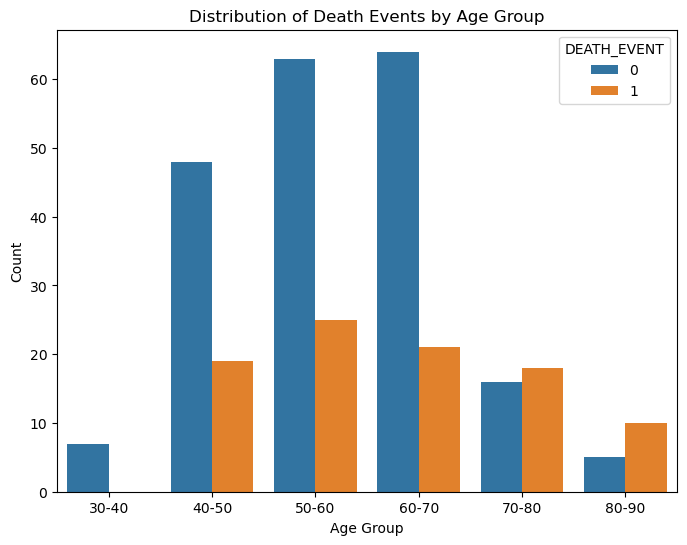

In [23]:
# Are there any noticeable patterns in the distribution of death events across different age groups?

plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='DEATH_EVENT', data=df)
plt.title('Distribution of Death Events by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


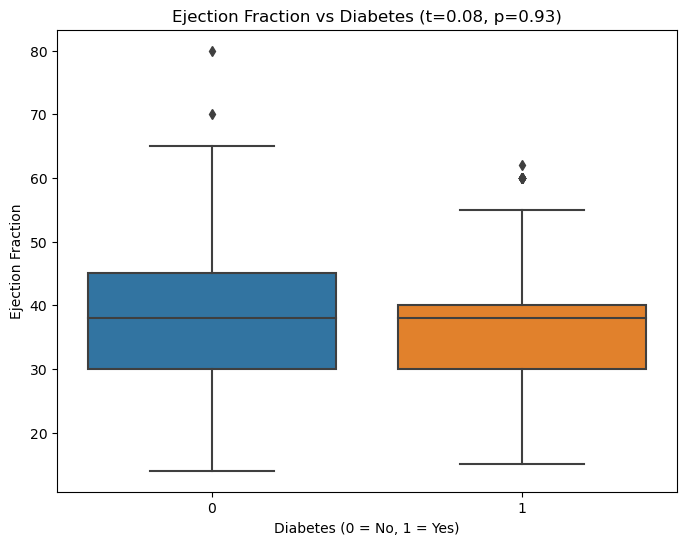

T-test: t-statistic=0.08358970647234736, p-value=0.9334389630426103


In [24]:
 # Is there a significant difference in ejection fraction between patients with and without diabetes?
    
diabetes_group = df.groupby('diabetes')['ejection_fraction']
non_diabetic = diabetes_group.get_group(0)
diabetic = diabetes_group.get_group(1)

# Perform t-test
t_stat, p_value = ttest_ind(non_diabetic, diabetic)

plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title(f'Ejection Fraction vs Diabetes (t={t_stat:.2f}, p={p_value:.2f})')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction')
plt.show()

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')


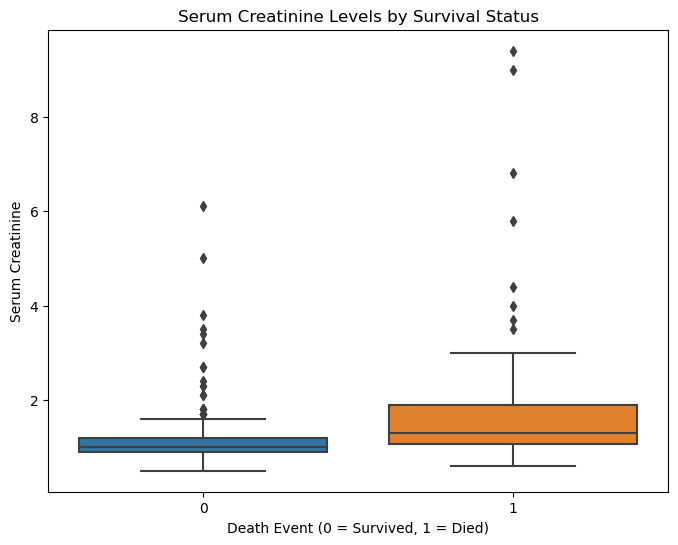

Mann-Whitney U test: U-statistic=5298.0, p-value=1.5809979011834038e-10


In [25]:
# How does the serum creatinine level vary between patients who survived and those who did not?


plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Death Event (0 = Survived, 1 = Died)')
plt.ylabel('Serum Creatinine')
plt.show()

# Mann-Whitney U test
survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
died = df[df['DEATH_EVENT'] == 1]['serum_creatinine']
u_stat, p_value = mannwhitneyu(survived, died)

print(f'Mann-Whitney U test: U-statistic={u_stat}, p-value={p_value}')
